Much more examples and tutorials can be found at: https://github.com/Qiskit/qiskit-tutorials

# Login to IBM Q Experience (Beta)

Let's use the new IBM Q Experience Beta here: https://quantum-computing.ibm.com
Login and navigate to 'Qiskit Notebooks':
![Notebooks_navigation](img/Beta_Notebooks.png)

# 1 Explore the available backends

1.1 Provide your token which enables you to use IBM-Q through QISKit

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [2]:
# Loading your IBM Q account(s)
# If you are using Qiskit on your computer, you need to first save account with:
#IBMQ.save_account("<token>")
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
provider = IBMQ.get_provider()

In [7]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>]

1.2 Let's list all the available backends

In [6]:
from qiskit.tools.monitor import backend_overview
backend_overview()

ibmq_ourense                 ibmq_16_melbourne           ibmqx4
------------                 -----------------           ------
Num. Qubits:  5              Num. Qubits:  14            Num. Qubits:  5
Pending Jobs: 106            Pending Jobs: 67            Pending Jobs: 11
Least busy:   False          Least busy:   True          Least busy:   False
Operational:  True           Operational:  True          Operational:  False
Avg. T1:      95.7           Avg. T1:      51.7          Avg. T1:      44.0
Avg. T2:      73.4           Avg. T2:      67.0          Avg. T2:      19.0



ibmqx2
------
Num. Qubits:  5
Pending Jobs: 30
Least busy:   False
Operational:  False
Avg. T1:      51.7
Avg. T2:      45.6





In [8]:
from qiskit.tools.jupyter import *
%qiskit_backend_overview

1.3 Let's choose one of the backends and check it's properties

In [10]:
backend=provider.get_backend('ibmq_16_melbourne')
backend.status()

BackendStatus(backend_name='ibmq_16_melbourne', backend_version='1.0.0', operational=True, pending_jobs=33, status_msg='active')

In [11]:
from qiskit.tools.monitor import backend_monitor
backend_monitor(backend)

ibmq_ourense
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 138
    backend_version: 1.0.0
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    backend_name: ibmq_ourense
    max_experiments: 75
    coupling_map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]
    n_registers: 1
    conditional: False
    open_pulse: False
    max_shots: 8192
    memory: True
    credits_required: True
    allow_q_object: True
    url: None
    sample_name: Giraffe
    description: 5 qubit device
    allow_q_circuit: False
    online_date: 2019-07-03T04:00:00+00:00

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 4.81947 GHz / 100.98401 µs / 75.59887 µs / 0.0 / 0.00035 / 0.00071 / 0.016
    Q1 / 4.8911 GHz / 80.9134 µs / 31.27345 µs / 0.0 / 0.00036 / 0.00071 / 0.025
    Q2 / 4.71689 GHz 

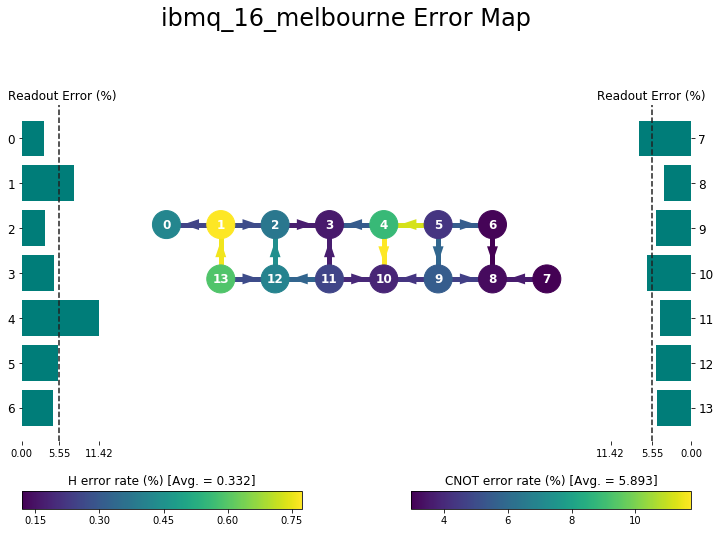

In [11]:
plot_error_map(backend)

# 2 Run Bell circuit on real quantum computer from Qiskit

In [12]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[1])
circuit.cx(qr[1], qr[0])
circuit.measure(qr, cr)

# 3 Run the algorithm on real quantum computer

In [7]:
job = execute(circuit, backend=backend, shots=1024)

In [8]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

In [9]:
job_id = job.job_id()
print('JOB ID: {}'.format(job_id))

JOB ID: 5d76638880f51900113bb3d1


In [10]:
job.queue_position()

59

You can wait for the job completion with this command (checking queue position every 5 seconds):

`from qiskit.tools.monitor import job_monitor`

`job_monitor(job, interval=5)`

In [11]:
job.backend()

<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
job.creation_date()